# Clasificador de números

Cargar el dataset. `mnist` contiene 70000 imágenes (60000 se usan en entrenamiento y 10000 para validación. Las imágenes provienen de números escritos a mano por diferentes personas.

In [1]:
from keras.datasets import mnist

El móduglo mnist permite separar de forma automática este set en entrenamiento.

In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt
import numpy as np

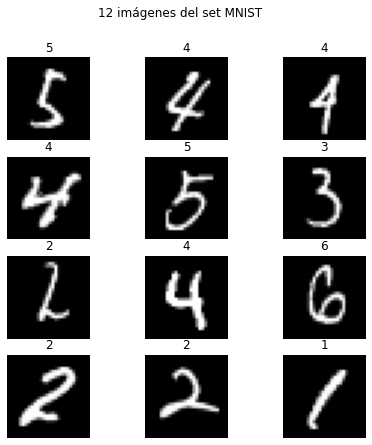

In [7]:
images = np.random.randint(0, x_train.shape[0], 12)
plt.figure(figsize=(7, 7))

for i in range(len(images)):
    img = x_train[images[i], : , :]
    plt.subplot(4, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(y_train[images[i]])
plt.suptitle('12 imágenes del set MNIST')
plt.show()

## Prepocesamiento de los datos

Cada imagen es una matriz (en este caso de 20x20 px), pero la red neuronal requiere que los datos sean enviados como un vector, y el vector tendra en este caso $28*28 = 748$ valores.

En la posición 0 está la cantidad de imágenes (60000 de entrenamiento y 10000 de validación). En la posición 1 y 2 está el tamaño de la matriz de la imagen, en este caso 28 y 28.

In [25]:
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] * x_test.shape[2]))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# Normalizar los datos

Como son imágenes, los valores de los píxeles oscilan entre 0 y 255, pero se requieren que estén entre 0 y 1, por tanto se dividen entre 255

In [26]:
X_train = X_train/255.0
X_test = X_test/255.0

En este conjunto de datos tenemos 10 categorias. Estas se pueden representar con el formato one-hot. Acá se tiene un vector de 10 elementos (es decir el mismo número de categorías) donde sólo uno de estos elementos será diferente de cero. Por ejemplo, si la categoria es 0 la representación one-hot correspondiente será el arreglo [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [27]:
from keras.utils import np_utils

n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

## Construcción del modelo

(Opcional) Se establece una semilla para que siempre se obtenga el mismo desempeño de la red, cada vez que se ejecuta

In [28]:
np.random.seed(1)

input_dim = X_train.shape[1]        # Tamaño de la capa de entrada (tamaño de cada imagen = 784)
output_dim = Y_train.shape[1]       # Tamaño de la capa de salida (Cantidad de etiquetas posibles = 10)

Contruir el modelo de red neuronal

In [29]:
model = Sequential()

model.add(Dense(20, input_dim=input_dim, activation='relu'))      # 20 neuronas en la capa oculta
model.add(Dense(output_dim, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


## Compilar el modelo

Se utiliza el optimizer SGD porque es un ejemplo multiclase

In [31]:
import tensorflow as tf
from tensorflow import keras


model.compile(keras.optimizers.SGD(0.2), loss='categorical_crossentropy', metrics=['accuracy'])

## Entrenamiento

Se harán 200 iteraciones, en lotes de 1024 y que se imprima la información

In [32]:
model_entrenado = model.fit(X_train, Y_train, epochs=200, batch_size=1024, verbose=2)

Epoch 1/200
59/59 - 1s - loss: 0.9996 - accuracy: 0.7163
Epoch 2/200
59/59 - 0s - loss: 0.4504 - accuracy: 0.8795
Epoch 3/200
59/59 - 0s - loss: 0.3673 - accuracy: 0.8978
Epoch 4/200
59/59 - 0s - loss: 0.3329 - accuracy: 0.9068
Epoch 5/200
59/59 - 0s - loss: 0.3121 - accuracy: 0.9116
Epoch 6/200
59/59 - 0s - loss: 0.2955 - accuracy: 0.9172
Epoch 7/200
59/59 - 0s - loss: 0.2827 - accuracy: 0.9197
Epoch 8/200
59/59 - 0s - loss: 0.2722 - accuracy: 0.9233
Epoch 9/200
59/59 - 0s - loss: 0.2627 - accuracy: 0.9254
Epoch 10/200
59/59 - 0s - loss: 0.2550 - accuracy: 0.9278
Epoch 11/200
59/59 - 0s - loss: 0.2475 - accuracy: 0.9301
Epoch 12/200
59/59 - 0s - loss: 0.2404 - accuracy: 0.9321
Epoch 13/200
59/59 - 0s - loss: 0.2342 - accuracy: 0.9331
Epoch 14/200
59/59 - 0s - loss: 0.2284 - accuracy: 0.9349
Epoch 15/200
59/59 - 0s - loss: 0.2238 - accuracy: 0.9365
Epoch 16/200
59/59 - 0s - loss: 0.2186 - accuracy: 0.9381
Epoch 17/200
59/59 - 0s - loss: 0.2139 - accuracy: 0.9395
Epoch 18/200
59/59 - 0s

Text(0.5, 0, 'Iteración')

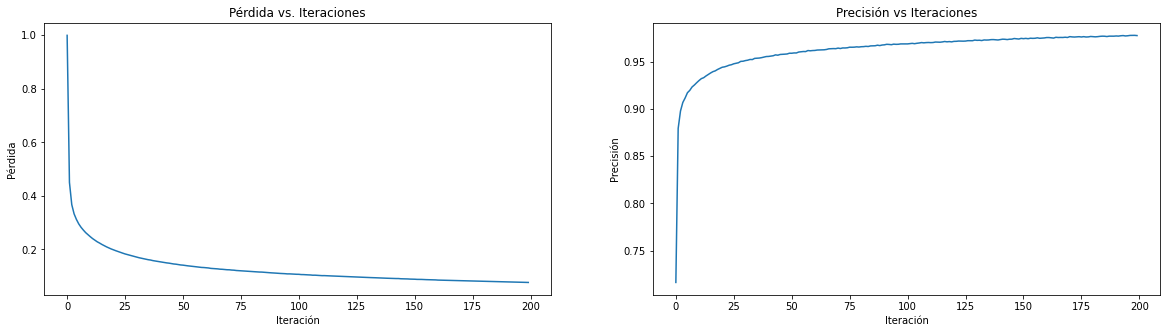

In [33]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(model_entrenado.history['loss'])
plt.title('Pérdida vs. Iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

plt.subplot(1, 2, 2)
plt.plot(model_entrenado.history['accuracy'])
plt.title('Precisión vs Iteraciones')
plt.ylabel('Precisión')
plt.xlabel('Iteración')

## Validación

In [34]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(f'Precisión en el set de validación {100 * score[1]}')

Precisión en el set de validación 95.85999846458435


Precisión en el set de validación: 95.9%


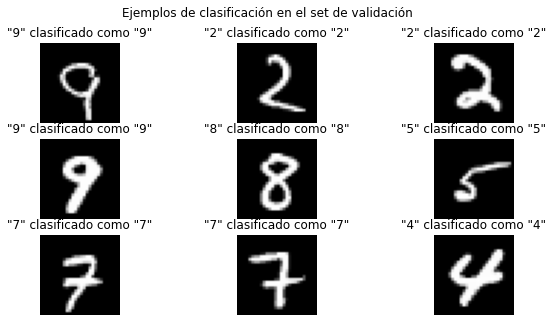

In [39]:
puntaje = model.evaluate(X_test,Y_test,verbose=0)
print('Precisión en el set de validación: {:.1f}%'.format(100*puntaje[1]))
Y_pred = model.predict(X_test)
classes_y=np.argmax(Y_pred,axis=1)

plt.figure(figsize=(10,5))
imagenes = np.random.randint(0,X_test.shape[0],9)
for i in range(len(imagenes)):
	idx = imagenes[i]
	img = X_test[idx,:].reshape(28,28)
	cat_original = np.argmax(Y_test[idx,:])
	cat_prediccion = classes_y[idx]

	plt.subplot(3,3,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title('"{}" clasificado como "{}"'.format(cat_original,cat_prediccion))
plt.suptitle('Ejemplos de clasificación en el set de validación')
plt.show()
